In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import matplotlib

from matplotlib.pyplot import figure

%matplotlib inline


In [2]:
df=pd.read_csv('Ramen_ratings_2020.csv')
df.head()

ID                                                URL    Brand  \
0  3473  https://www.theramenrater.com/2020/04/05/3473-...  MyKuali   
1  3472  https://www.theramenrater.com/2020/04/05/3472-...  MyKuali   
2  3471  https://www.theramenrater.com/2020/04/05/3471-...  Ve Wong   
3  3470  https://www.theramenrater.com/2020/04/04/3470-...    Myojo   
4  3469  https://www.theramenrater.com/2020/04/03/3469-...  Mykuali   

                                             Variety Style   Country Stars  
0                            White Fish Broth Noodle  Pack  Malaysia     5  
1             Penang White Curry Noodle (New Recipe)  Pack  Malaysia     5  
2  Instant Oriental Noodles Soup Chinese Herb - G...  Pack    Taiwan  3.75  
3                    Ippeichan Rich & Sweet Yakisoba  Tray     Japan     5  
4          Penang Hokkien Prawn Rice Vermicelli Soup  Bowl  Malaysia     5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       3473 non-null   object
 1   URL      3473 non-null   object
 2   Brand    3473 non-null   object
 3   Variety  3473 non-null   object
 4   Style    3473 non-null   object
 5   Country  3473 non-null   object
 6   Stars    3473 non-null   object
dtypes: object(7)
memory usage: 190.1+ KB


In [4]:
df['Country'].nunique()

50

In [5]:
df['Country'].unique()

array(['Malaysia', 'Taiwan', 'Japan', 'United States', 'Thailand',
       'Indonesia', 'France', 'South Korea', 'China', 'Singapore',
       'Hong Kong', 'Souh Korea', 'Brazil', 'Israel', 'Vietnam', 'Mexico',
       'Canada', 'Peru', 'Spain', 'Portugal', 'United Kingdom', 'Italy',
       'Russia', 'Philippines', 'Bangladesh', 'Australia', 'New Zealand',
       'Ukraine', 'Sarawak', 'Netherlands', 'Poland', 'Germany', 'USA',
       'India', 'Phlippines', 'Nigeria', 'Ghana', 'Hungary', 'Fiji',
       'Pakistan', 'Nepal', 'UK', 'Myanmar', 'Cambodia', 'Finland',
       'Sweden', 'Colombia', 'Estonia', 'Holland', 'Dubai'], dtype=object)

In [6]:
# Change wrong names
df.loc[df['Country'] == 'Souh Korea', 'Country'] = 'South Korea'
df.loc[df['Country'] == 'Phlippines', 'Country'] = 'Philippines'
df.loc[df['Country'] == 'USA', 'Country'] = 'United States'
df.loc[df['Country'] == 'UK', 'Country'] = 'United Kingdom'
df.loc[df['Country'] == 'Holland', 'Country'] = 'Netherlands'


In [7]:
df['Stars'].value_counts()

5          614
3.75       508
3.5        497
4          412
3.25       215
4.5        210
4.25       199
3          168
2.75       109
2           93
2.5         91
4.75        88
1.5         48
0           38
1           38
1.75        28
2.25        28
0.5         19
0.25        17
1.25        13
Unrated      3
NR           3
2.9          2
3.1          2
1.1          2
2.8          2
4.25/5       2
4.125        2
3.7          1
0.1          1
3.65         1
3.4          1
3.6          1
2.3          1
3.2          1
2.125        1
2.85         1
4.5/5        1
3.125        1
0.9          1
2.1          1
0.75         1
3.50         1
5/4          1
5/2.5        1
5/5          1
4/4          1
3.5/2.5      1
NS           1
1.8          1
Name: Stars, dtype: int64

In [8]:
#delete inappropriate rating
df=df[~df['Stars'].str.contains('Unrated|NR|NS')]

In [9]:
df['Stars'].value_counts()

5          614
3.75       508
3.5        497
4          412
3.25       215
4.5        210
4.25       199
3          168
2.75       109
2           93
2.5         91
4.75        88
1.5         48
0           38
1           38
2.25        28
1.75        28
0.5         19
0.25        17
1.25        13
4.125        2
3.1          2
2.8          2
1.1          2
4.25/5       2
2.9          2
2.85         1
3.4          1
3.7          1
2.3          1
3.2          1
0.1          1
3.65         1
2.125        1
3.6          1
4.5/5        1
3.125        1
0.9          1
2.1          1
0.75         1
3.50         1
5/4          1
5/2.5        1
5/5          1
4/4          1
3.5/2.5      1
1.8          1
Name: Stars, dtype: int64

In [10]:
#delete / in rating
def strip_slash(star):
    if '/' in star:
        return float(star.split('/')[0])
    else:       
        return float(star)
df.loc[:,'Stars'] = df.loc[:,'Stars'].astype(str).apply(strip_slash)  


In [11]:
df.loc[:,'Stars']=round(df.loc[:,'Stars'],0)

### Extract date from URL

In [12]:
# Extract the date from URL
import re
def date_extract(url):
    date=re.search('(?<=\/)(\d{4}\/\d{2}\/\d{2})(?=\/)',url)
    if date:
        return date.group()
    else:
        return None
df['date_review']=df['URL'].apply(date_extract)

In [13]:
from datetime import datetime
df['date_review']=df['date_review'].apply(lambda x:datetime.strptime(x, '%Y/%m/%d'))

In [14]:
df['year_review']=df['date_review'].dt.year

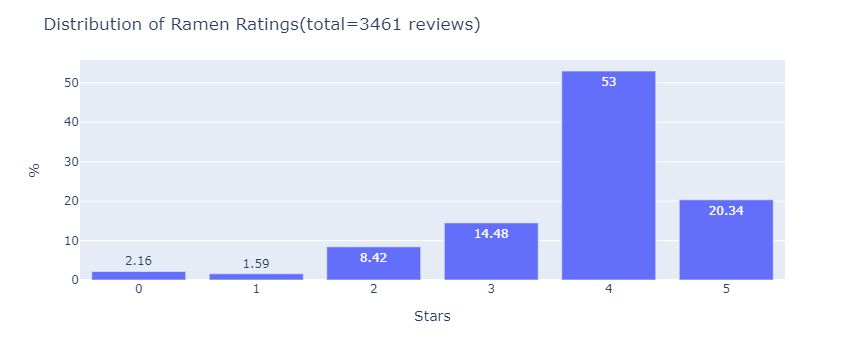

In [15]:
# plot the distribution of rating
import plotly_express as px
rating_distribution=df['Stars'].value_counts(normalize=True).reset_index()
rating_distribution.columns=['Stars','Percent']
rating_distribution['Percent']=rating_distribution['Percent'].apply(lambda x:round(x*100,2))
fig = px.bar(
    rating_distribution,
    x=rating_distribution['Stars'],
    y="Percent",
    labels={"Stars": "Stars", "Percent": "% "},text_auto=True,
).update_xaxes(
    categoryorder="array",
)
fig.update_layout(
    title="Distribution of Ramen Ratings(total=3461 reviews)",
    
)
fig


In [16]:
len(df)

3466

In [17]:
# work with packaging
df['Style'].value_counts()

Pack          1977
Bowl           671
Cup            607
Tray           156
Box             50
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

In [18]:
# Filter out unusual styles
df=df[~df['Style'].str.contains('Restaurant|Can|Bar')]

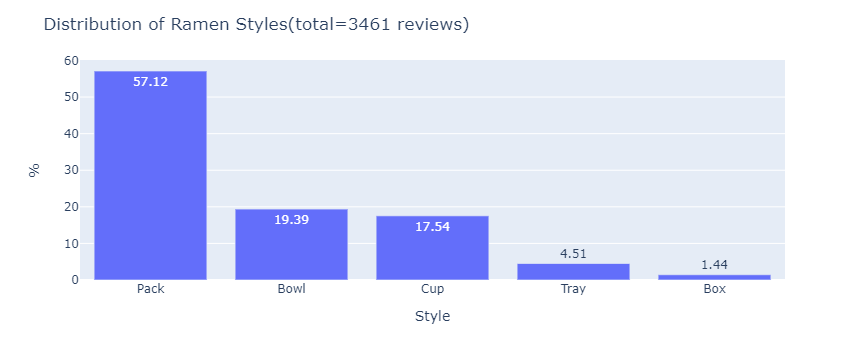

In [19]:
# Plot the distribution of reviews by Style
style_distribution=df['Style'].value_counts(normalize=True).reset_index()
style_distribution.columns=['Style','Percent']
style_distribution['Percent']=style_distribution['Percent'].apply(lambda x: round(x*100,2))

fig = px.bar(
    style_distribution,
    x=style_distribution['Style'],
    y="Percent",
    labels={"Percent": "%", "Style": "Style "},text_auto=True,
).update_xaxes(
    categoryorder="total descending",
)
fig.update_layout(
    title="Distribution of Ramen Styles(total=3461 reviews)",
    
)

fig

In [20]:
# cup and bowl style over years
cup_bowl_style=df[df['Style'].str.contains('Bowl|Cup')]
cup_bowl_style.groupby('year_review').size()

year_review
2009      8
2010     38
2011    165
2012    128
2013     93
2014     73
2015    115
2016    176
2017    174
2018    143
2019    123
2020     42
dtype: int64

In [52]:
# average rating of cup and bowl style ramen
cup_bowl_style['Stars'].mean()


3.6604068857589986

In [53]:
# % of rating for cup and bowl style
cup_bowl_style['Stars'].value_counts(normalize=True)

4.0    0.546166
5.0    0.165884
3.0    0.145540
2.0    0.095462
0.0    0.028169
1.0    0.018779
Name: Stars, dtype: float64

In [55]:
# % of rating for pack style
pack_style=df[df['Style']=='Pack']
pack_style['Stars'].value_counts(normalize=True)

4.0    0.529084
5.0    0.219019
3.0    0.147193
2.0    0.074861
0.0    0.015680
1.0    0.014163
Name: Stars, dtype: float64

In [56]:
pack_style['Stars'].mean()

3.8168942842690945

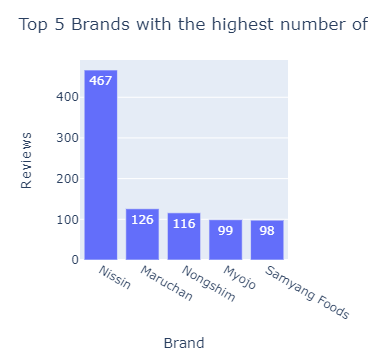

In [21]:
# Plot the distribution of reviews by Brand
Brand_distribution=df['Brand'].value_counts()[:5].to_frame()
fig = px.bar(
    Brand_distribution,
    x=Brand_distribution.index,
    y="Brand",
    labels={"Brand": "Reviews", "index": "Brand "},text_auto=True,
).update_xaxes(
    categoryorder="total descending",
)
fig.update_layout(
    title="Top 5 Brands with the highest number of reviews(total=3461 reviews)",
    
)

fig

In [22]:
# Median of rating for top 5 brands
brand_rating=df.groupby('Brand').agg({'Stars':'median'})
brand_rating


Stars
Brand                   
1 To 3 Noodles       4.0
7 Select             4.0
7 Select/Nissin      4.0
7-Eleven / Nissin    4.0
A-One                3.0
...                  ...
Zombear              4.0
Zow Zow              4.0
iMee                 3.5
iNoodle              3.0
nunu                 4.0

[504 rows x 1 columns]

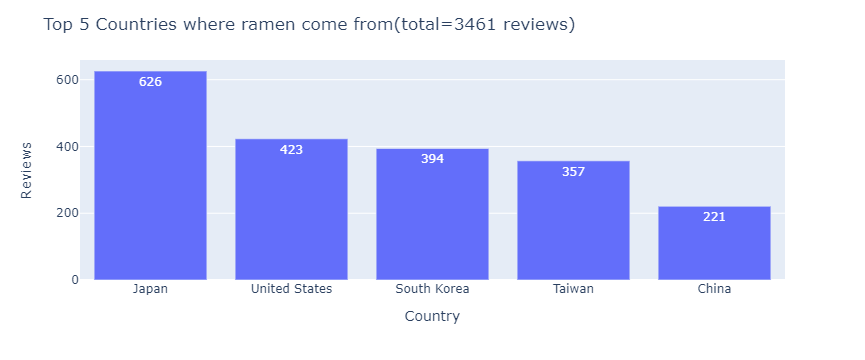

In [23]:
# Plot the distribution of reviews by countries
Country_distribution=df['Country'].value_counts()[:5].to_frame()
fig = px.bar(
    Country_distribution,
    x=Country_distribution.index,
    y="Country",
    labels={"Country": "Reviews", "index": "Country "},text_auto=True,
).update_xaxes(
    categoryorder="total descending",
)
fig.update_layout(
    title="Top 5 Countries where ramen come from(total=3461 reviews)",
    
)

fig

In [24]:
# United States: 
USA_country=df[df['Country']=='United States']
USA_country.groupby('Brand').size()
               

Brand
Annie Chun's           12
Authentically Asian     1
Blount                  3
COCO 2.0                1
Chikara                 1
                       ..
Tradition               5
US Canning              1
Vite Ramen              8
Westbrae                1
Yamachan               12
Length: 64, dtype: int64

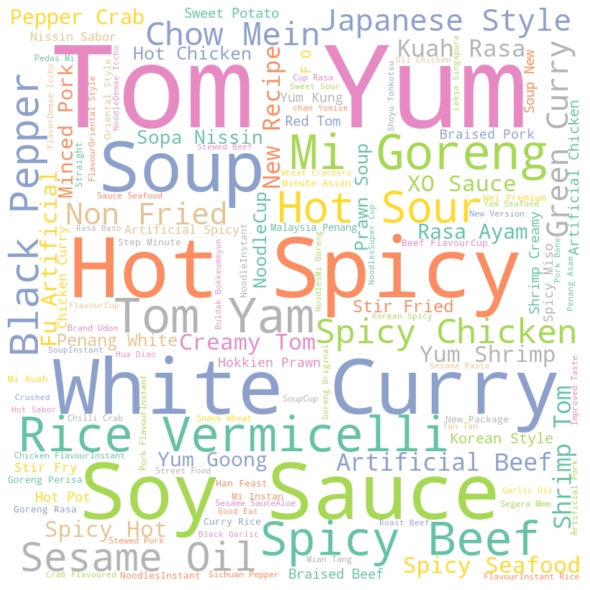

In [25]:
# Create a word cloud for variety to find common flavors
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text="".join(df['Variety'].values)
def make_wordcloud(new_text):
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["noodle", "Noodle","Noodles","Flavour", "ramen","Ramen", "flavor", "flavors","Instant"])
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords,width=800,height=800,min_font_size=10,
    background_color="white",colormap="Set2",collocation_threshold=3).generate(text)
    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

text_cloud = make_wordcloud(text)

In [26]:
# Extract the date from URL
import re
def date_extract(url):
    date=re.search('(?<=\/)(\d{4}\/\d{2}\/\d{2})(?=\/)',url)
    if date:
        return date.group()
    else:
        return None
df['date_review']=df['URL'].apply(date_extract)

In [27]:
from datetime import datetime
df['date_review']=df['date_review'].apply(lambda x:datetime.strptime(x, '%Y/%m/%d'))

In [28]:
df['year_review']=df['date_review'].dt.year

In [29]:
df['year_review'].value_counts()

2016    399
2017    385
2018    382
2011    359
2012    334
2015    329
2013    320
2019    316
2014    282
2010    194
2020     98
2009     63
Name: year_review, dtype: int64

### Wordclouds of Varitety for each year

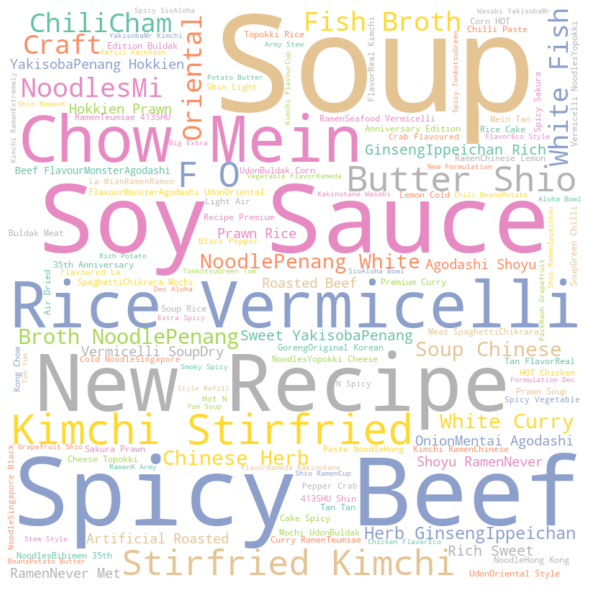

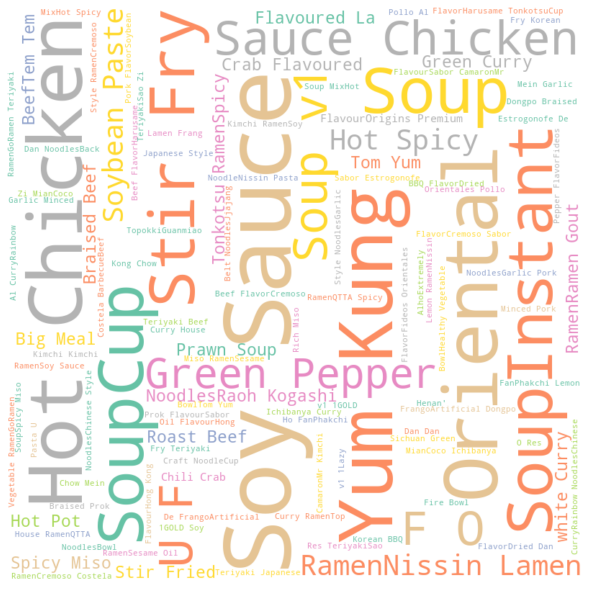

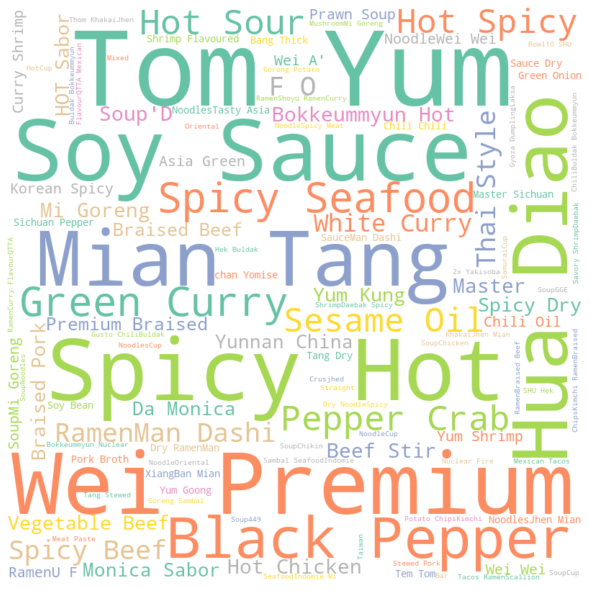

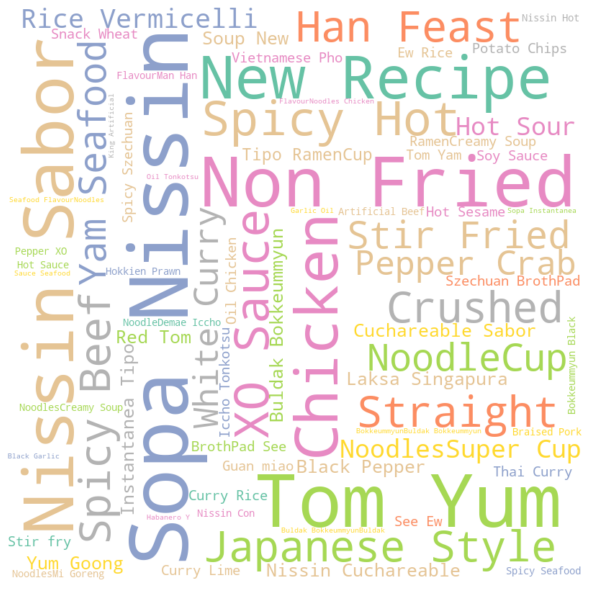

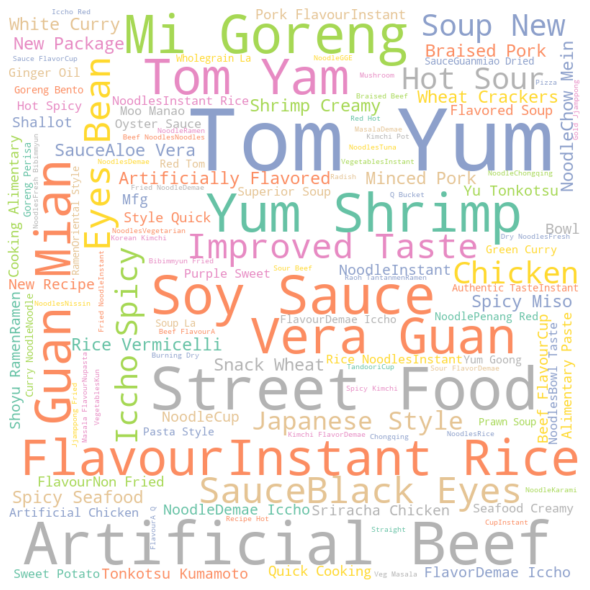

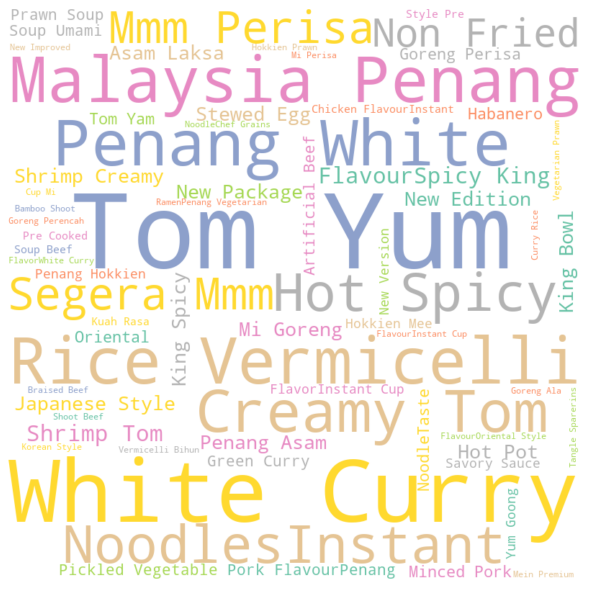

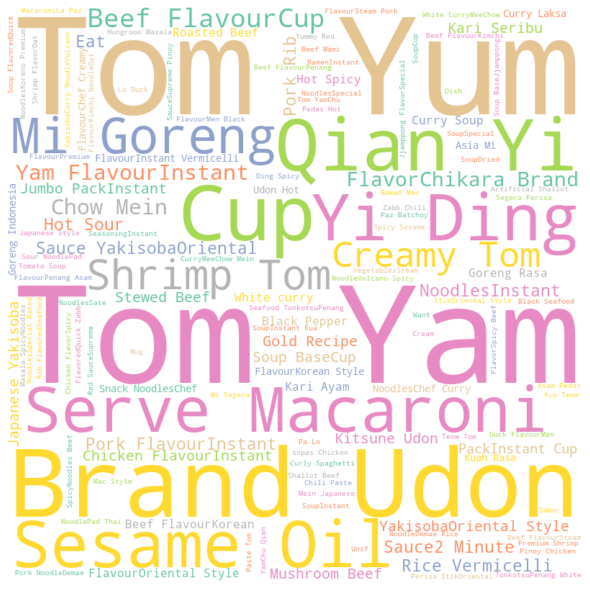

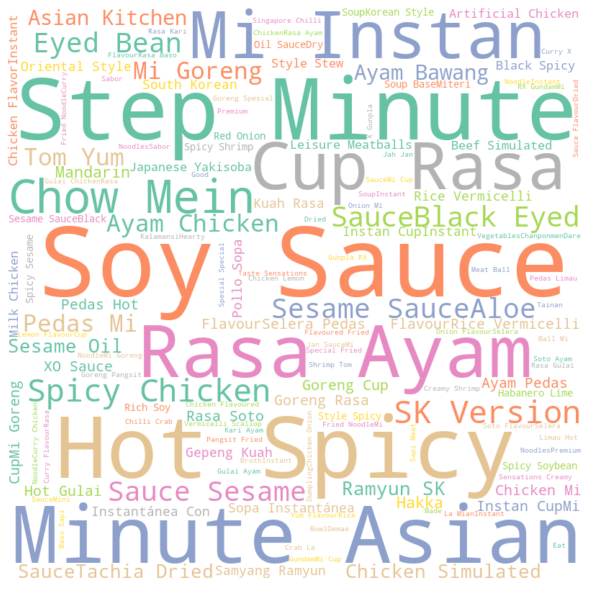

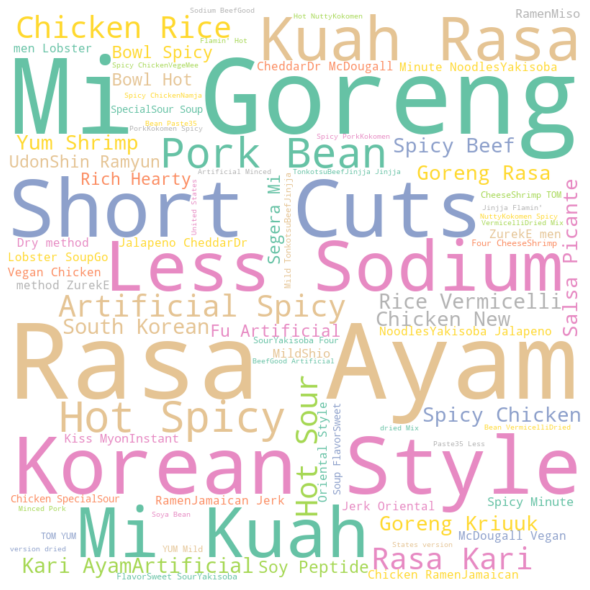

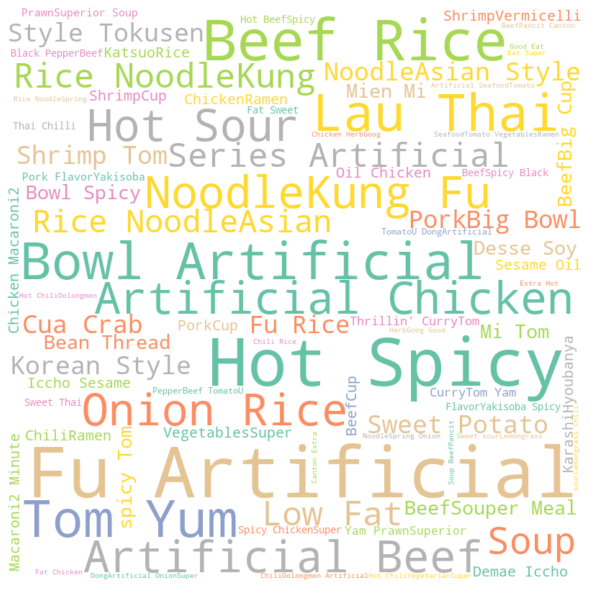

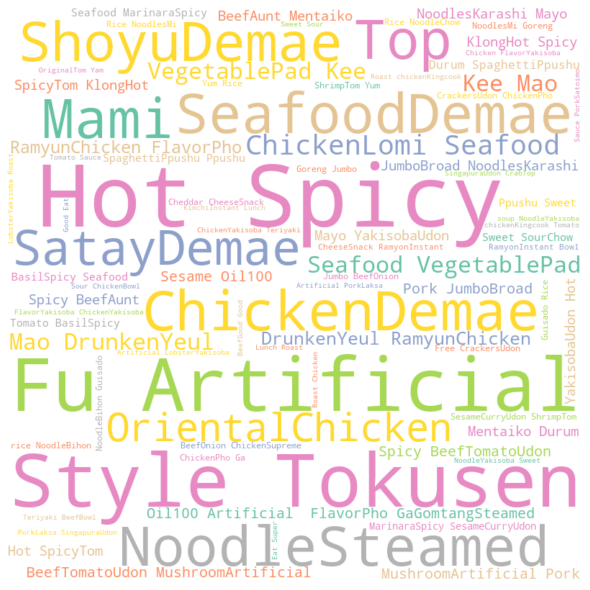

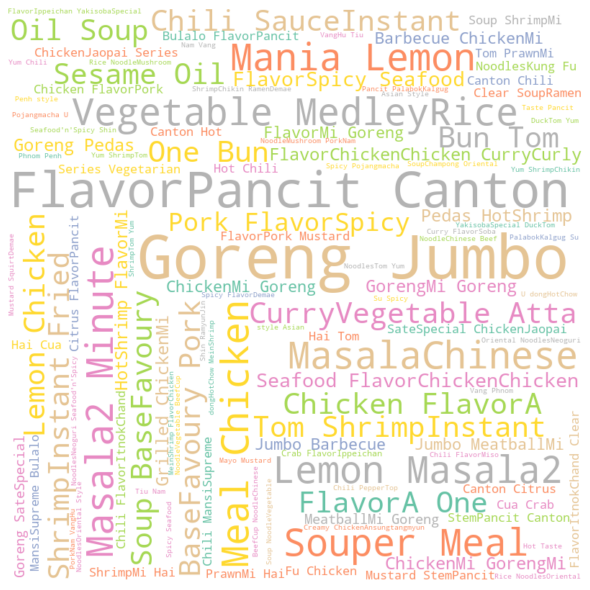

In [30]:
# How does variety change over year?


def wordcloud_by_year(selected_year):
    df_ramen=df[df['year_review']==selected_year]
    text = ''.join(str(p) for p in df_ramen['Variety'])
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["noodle", "Noodle","Noodles","Flavour", "ramen","Ramen", "flavor", "flavors","Instant"])
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords,width=800,height=800,min_font_size=10,
    background_color="white",colormap="Set2",collocation_threshold=3).generate(text)
    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    #plt.show()
    # save word cloud image to file
#     filename=f"ramen_variety_{selected_year}.png"
#     plt.savefig(filename, format='png')
#     plt.close()
    
#     print(f"Word cloud for {selected_year} saved as {filename}")

unique_years=df['year_review'].unique()
for year in unique_years:
    wordcloud_by_year(year)
    




### Map the countries of ramen

In [31]:
import pycountry
def alphacode3(country):
    try:
        code=pycountry.countries.get(name=country).alpha_3
        return code
    except AttributeError:
        return 'None'
df['Code']=df['Country'].apply(lambda x:alphacode3(x))
    

In [32]:
not_code_country=df[df['Code']=='None']
not_code_country

ID                                                URL           Brand  \
2     3471  https://www.theramenrater.com/2020/04/05/3471-...         Ve Wong   
5     3468  https://www.theramenrater.com/2020/04/02/3468-...  Little Couples   
13    3460  https://www.theramenrater.com/2020/03/25/3460-...           Paldo   
14    3459  https://www.theramenrater.com/2020/03/24/3459-...   Samyang Foods   
16    3457  https://www.theramenrater.com/2020/03/21/3457-...   Samyang Foods   
...    ...                                                ...             ...   
3464    10  https://www.theramenrater.com/2009/06/22/smack...           Sutah   
3465     8  https://www.theramenrater.com/2009/06/22/tung-...          Tung-I   
3466     7  https://www.theramenrater.com/2009/06/22/ve-wo...         Ve Wong   
3467     6  https://www.theramenrater.com/2009/06/22/vifon...           Vifon   
3468     5  https://www.theramenrater.com/2009/06/22/vifon...           Vifon   

                                                Variety Style      Country  \
2     Instant Oriental Noodles Soup Chinese Herb - G...  Pack       Taiwan   
5                                    Dry Noodle - Onion  Pack       Taiwan   
13                   Bibimen (35th Anniversary Edition)  Pack  South Korea   
14                                Buldak Meat Spaghetti  Bowl  South Korea   
16                 Buldak Corn HOT Chicken Flavor Ramen  Pack  South Korea   
...                                                 ...   ...          ...   
3464                                         Cup Noodle   Cup  South Korea   
3465                   Chinese Beef Instant Rice Noodle  Pack       Taiwan   
3466                                      Mushroom Pork  Pack      Vietnam   
3467                                           Nam Vang  Pack      Vietnam   
3468  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...  Bowl      Vietnam   

      Stars date_review  year_review  Code  
2       4.0  2020-04-05         2020  None  
5       5.0  2020-04-02         2020  None  
13      4.0  2020-03-25         2020  None  
14      4.0  2020-03-24         2020  None  
16      4.0  2020-03-21         2020  None  
...     ...         ...          ...   ...  
3464    2.0  2009-06-22         2009  None  
3465    3.0  2009-06-22         2009  None  
3466    1.0  2009-06-22         2009  None  
3467    2.0  2009-06-22         2009  None  
3468    4.0  2009-06-22         2009  None  

[877 rows x 10 columns]

In [33]:
len(not_code_country)

877

In [34]:
not_code_country['Country'].unique()

array(['Taiwan', 'South Korea', 'Vietnam', 'Russia', 'Sarawak', 'Dubai'],
      dtype=object)

In [35]:
def missing_code(country):
    if country=='Taiwan':
        return 'TWN'
    elif country=='South Korea':
        return 'KOR'
    elif country=='Vietnam':
        return 'VNM'
    elif country=='Russia':
        return 'RUS'
    elif country=='Sarawak':
        return 'MYS'
    else:
        return 'ARE'
not_code_country.loc[:,'Code']=not_code_country['Country'].apply(lambda x:missing_code(x))

C:\Users\Admin\AppData\Local\Temp\ipykernel_15412\3999500881.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df.loc[df['Code'] == 'None', 'Code'] = not_code_country['Code']

In [37]:
#df.to_csv('Ramen_rating_cleaned_2020.csv',index=False)

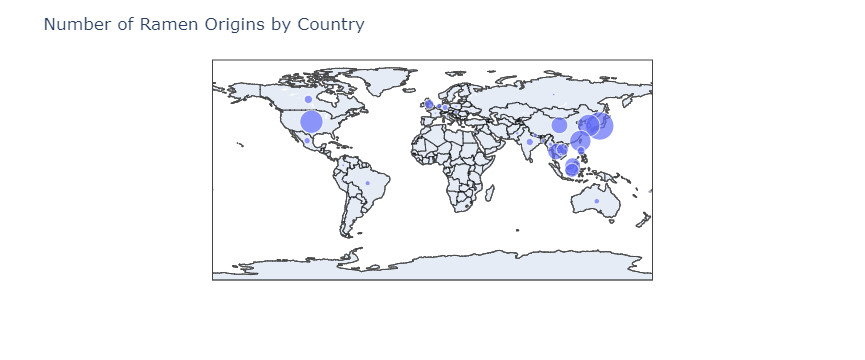

In [38]:
import plotly.express as px
country_count=df['Country'].value_counts().reset_index()
country_count.columns=['Country','Count']


fig = px.scatter_geo(country_count, locations="Country", locationmode="country names",
                      hover_name="Country", size="Count")

# Step 3: Customize the appearance of the map
fig.update_geos(showcountries=True, countrycolor="Black", countrywidth=0.5)
fig.update_layout(title_text='Number of Ramen Origins by Country')
fig.show()

### Reviews over the years

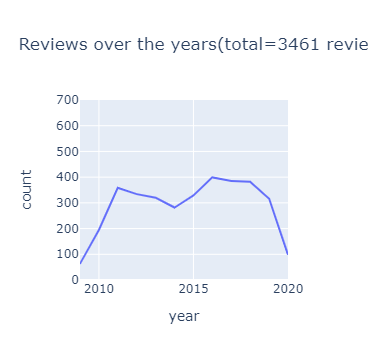

In [39]:
# Number of reviews over the years
year_reviews=df['year_review'].value_counts().reset_index()
year_reviews.columns=['year','count']
year_reviews=year_reviews.sort_values(by='year')
fig=px.line(year_reviews,x='year',y='count',title='Reviews over the years(total=3461 reviews)')
fig.update_yaxes(range=[0,700],tickvals=[0, 100, 200, 300, 400, 500, 600, 700])
fig.show()

In [40]:
# Rating over the years
year_rating=df.groupby('year_review').agg({'Stars':'mean'})
year_rating


Stars
year_review          
2009         2.952381
2010         3.154639
2011         3.376045
2012         3.694611
2013         3.815625
2014         3.769504
2015         3.841945
2016         3.892231
2017         3.958442
2018         3.947644
2019         3.946203
2020         3.816327

In [41]:

brand_year_count=df.groupby(['year_review','Brand']).size().reset_index(name='count')
brand_year_count

year_review                   Brand  count
0            2009                    Doll      2
1            2009  Hua Feng Noodle Expert      2
2            2009                 Indomie     10
3            2009             Kim Ve Wong      1
4            2009                    Koka      2
...           ...                     ...    ...
1034         2020                 Wai Wai      1
1035         2020                 Wei Lih      1
1036         2020                   Wu Mu      2
1037         2020                   Yibin      1
1038         2020             Young Poong      1

[1039 rows x 3 columns]

In [42]:
total_brand_count=brand_year_count.pivot_table('count',index='year_review',columns='Brand',aggfunc=sum)
total_brand_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2009 to 2020
Columns: 504 entries, 1 To 3 Noodles to nunu
dtypes: float64(504)
memory usage: 47.3 KB


In [43]:
subset=total_brand_count[['Nissin','Maruchan','Nongshim','Myojo','Samyang Foods']]
subset=subset.fillna(0)
subset

Brand        Nissin  Maruchan  Nongshim  Myojo  Samyang Foods
year_review                                                  
2009            7.0       1.0       4.0    2.0            0.0
2010           26.0      10.0      10.0   13.0            0.0
2011           31.0      16.0      17.0   10.0            0.0
2012           32.0      11.0      28.0    1.0            0.0
2013           40.0       9.0       7.0    4.0           18.0
2014           32.0       8.0       9.0    6.0            6.0
2015           21.0       3.0       8.0   14.0            2.0
2016          106.0      15.0       8.0   10.0            6.0
2017           96.0       5.0      11.0   10.0           27.0
2018           45.0      20.0       5.0   16.0           17.0
2019           19.0      17.0       6.0   10.0           15.0
2020           12.0      11.0       3.0    3.0            7.0

In [44]:
# subset.plot(subplots=True,figsize(10,12),grid=False,title="Number of reviews by brand over the years")
# plt.tight_layout()
# plt.show()

In [45]:
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
#review by day, week, month
df_time=df[['ID','date_review']].sort_values(by='date_review')

# Calculate the frequency of review

df_time['time_diff']=df_time['date_review'].diff()

df_time.set_index('date_review',inplace=True)
# Calculate weekly reviews
weekly_review=df_time.resample('W').size()

# Calculate monthly reviews
monthly_review=df_time.resample('M').size()



In [46]:
df_time
weekly_review
monthly_review

ID time_diff
date_review                
2009-06-22      1       NaT
2009-06-22      9    0 days
2009-06-22     10    0 days
2009-06-22      8    0 days
2009-06-22      7    0 days
...           ...       ...
2020-04-03   3469    1 days
2020-04-04   3470    1 days
2020-04-05   3471    1 days
2020-04-05   3472    0 days
2020-04-05   3473    0 days

[3461 rows x 2 columns]

date_review
2009-06-28    10
2009-07-05    50
2009-07-12     0
2009-07-19     2
2009-07-26     0
              ..
2020-03-08     7
2020-03-15     6
2020-03-22     8
2020-03-29     7
2020-04-05     9
Freq: W-SUN, Length: 563, dtype: int64

date_review
2009-06-30    56
2009-07-31     6
2009-08-31     0
2009-09-30     0
2009-10-31     0
              ..
2019-12-31    25
2020-01-31    36
2020-02-29    24
2020-03-31    31
2020-04-30     7
Freq: M, Length: 131, dtype: int64

In [59]:
# time between each review
df_time['time_diff'].value_counts()

1 days      2408
0 days       581
2 days       347
3 days        73
4 days        20
5 days        11
9 days         5
7 days         4
8 days         2
6 days         2
14 days        2
153 days       1
86 days        1
25 days        1
80 days        1
11 days        1
Name: time_diff, dtype: int64

### 5 star rating reviews

In [47]:
# How 5 star ratings change over year?
star_5=df[df['Stars']==5]


In [48]:
top_brands=star_5.groupby('Brand').agg({'ID':'count'}).reset_index()
top_brands_sorted=top_brands.sort_values(by='ID',ascending=False)
top_brands_sorted['Cumulative reviews']=top_brands_sorted['ID'].cumsum()
reviews_50_percent=top_brands_sorted[top_brands_sorted['Cumulative reviews']<=0.5*top_brands_sorted['ID'].sum()]
reviews_50_percent

Brand   ID  Cumulative reviews
103           Nissin  109                 109
105         Nongshim   31                 140
93           MyKuali   30                 170
128    Samyang Foods   24                 194
112            Paldo   24                 218
46           Indomie   20                 238
80          Maruchan   19                 257
96             Myojo   18                 275
78              Mama   15                 290
117      Prima Taste   12                 302
55              KOKA   12                 314
130  Sapporo Ichiban   10                 324
79             Mamee    9                 333
145              TTL    9                 342
164    Uni-President    8                 350

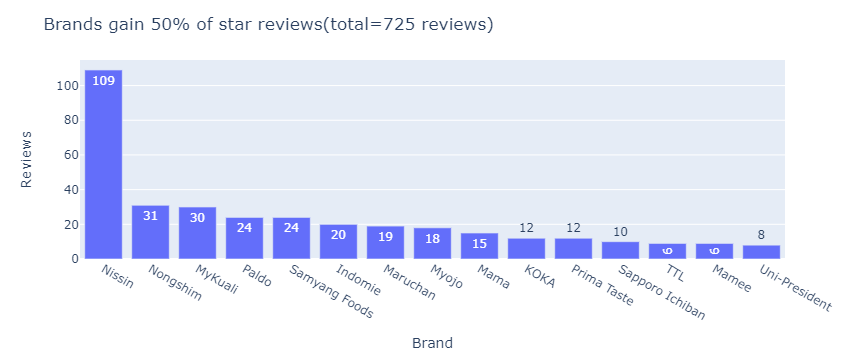

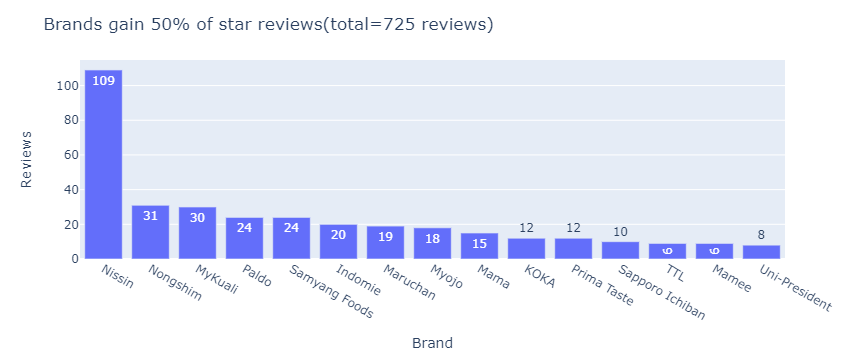

In [49]:
# top brands gain 50% of the number of 5 star reviews.
fig = px.bar(
    reviews_50_percent,
    x=reviews_50_percent['Brand'],
    y="ID",
    labels={"ID": "Reviews", "index": "Brand "},text_auto=True,
).update_xaxes(
    categoryorder="total descending",
)
fig.update_layout(
    title="Brands gain 50% of star reviews(total=725 reviews)",
    
)

fig


In [50]:
star_5.groupby('year_review').ID.count()

year_review
2009      6
2010     12
2011     17
2012     44
2013     43
2014     43
2015     78
2016    110
2017    110
2018    108
2019    103
2020     29
Name: ID, dtype: int64

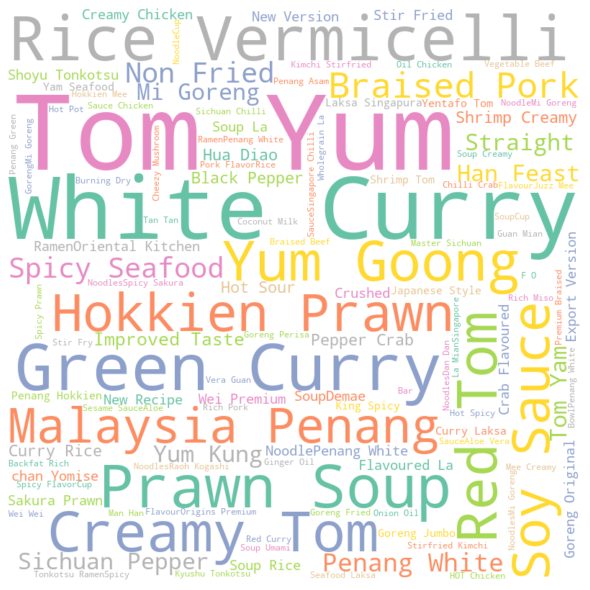

In [51]:
# Whether favourite flavors of 5 star reviews are different from overall reviews
text="".join(star_5['Variety'].values)

text_cloud = make_wordcloud(text)
